## Lab 04: Regression (starter notebook)
Banafshe Arbab-Zavar

## Task 1: Regression models & cross-validation
Let’s continue using the wine datasets and experiment with some regression models!

**learning targets:**
1. Training and test sets
2. Using various regression models
3. Evaluating the models using the performance measure
4. Working with the Scikit-Learn library

**Dataset:** https://www.kaggle.com/monntosky/wine-dataset-modified

**Useful resources:**

[1] Hands-on machine learning code for chapter 2: https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
I am going to reference this resource multiple times during today’s lab and refer you to the specific cells in this notebook as appropriate.

### Task activities:
1. Download the data
2. Using Python and inside your Jupyter notebook, load the Red wine dataset using pandas
3. Regression task: given the different features of the wines predict the density of the wine.
    1. First split the data into train and test sets. For this use: `train_test_split` function from `sklearn.model_selection`. See [1] cell 20 for an example.
    2. Using the correlation matrix from the previous lab, choose one feature to use to predict density.
    3. Prepare the data for regression: `import numpy as np` and transform your dataframe to a numpy array with `np.array(<data_frame>)`
    4. Learn a linear regression model (see [1] cells 83, 87 for an example to fit the model and compute the rmse)
    5. Use cross-validation to see how well the model generalises (see [1] cells 91 & 92)
    6. Learn a decision tree regression model (see [1] cells 89, 90 for an example to fit the model and compute the rmse) also use cross-validation to see how well the model generalises. 
    7. Learn a random forest regression model (see [1] cells 94, 95  for an example to fit the model and compute the rmse) also use cross-validation to see how well the model generalises. 

## Setup

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Task 1: 

In [4]:
df_Rwine = pd.read_csv('./data/wineQualityReds.csv')

Let's plot the heatmap using seaborns `heatmap` and pandas `corr` (correlation) function:

<AxesSubplot:>

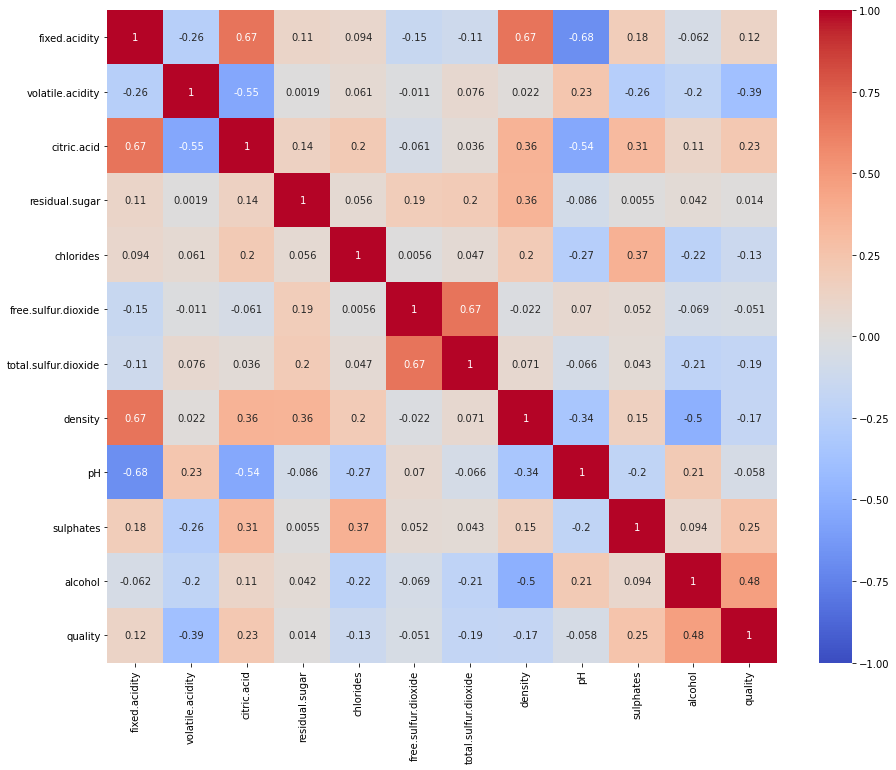

In [5]:
fig = plt.figure()
fig.set_size_inches(15, 12)
sns.heatmap((df_Rwine.drop(columns=['Unnamed: 0'])).corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

First of all we need to split the data into train and test sets and put the test sets aside.

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_Rwine, test_size=0.2, random_state=42)

Let's prepare the training set with only one feature. I used 'fixed.acidity' for example:

In [7]:
X_train_1feature = np.transpose(np.array([train_set['fixed.acidity']]))
X_test_1feature = np.transpose(np.array([test_set['fixed.acidity']]))

It is also always a good idea to standardise or scale your features:

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_1feature_scaled = scaler.fit_transform(X_train_1feature.astype(np.float64))
X_test_1feature_scaled = scaler.fit_transform(X_test_1feature.astype(np.float64))

In [9]:
y_train = np.transpose(np.array(train_set['density']))
y_test = np.transpose(np.array(test_set['density']))

Let's have a look at the shape of our arrays:

In [10]:
print("Shape of the training array with one feature: ", X_train_1feature_scaled.shape)

Shape of the training array with one feature:  (1279, 1)


And how about our test set?

In [11]:
print("Shape of the test array with one feature: ", X_test_1feature_scaled.shape)

Shape of the test array with one feature:  (320, 1)


And how about our target?

In [12]:
print("Shape of the targets array for the training set: ", y_train.shape)

Shape of the targets array for the training set:  (1279,)


Now that the data is prepared, continue with the remaining activities of task 1 and learn and evalute the regression models.

### 1. Linear regression
See https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb cells **83, 87** for an example of fitting a linear regression model and compute the RMSE)

**Hint:**
```python
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(<array of training features>, <array of targets or labels>)```

In [19]:
from sklearn.linear_model import LinearRegression
# X_train_1feature_scaled is the array of training features | cell 22
# y_train is the array of targets | Cell 24
lin_reg = LinearRegression()
regression = lin_reg.fit(X_train_1feature_scaled,y_train)

Now calculate the RMSE on the training data:

In [20]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X_train_1feature_scaled)
lin_mse = mean_squared_error(y_train,predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0013928185618143647

Now let's see how this model generalises using cross-validation. Use 3-fold cross-validation.

For an example of cross-validation and compute the rmse, see https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb cells **91 & 92**.

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_1feature_scaled,y_train)
scores = cross_val_score(tree_reg, X_train_1feature_scaled, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.00148409 0.00122887 0.00149828 0.00150405 0.00130135 0.00148338
 0.0014664  0.00138506 0.00137673 0.00141396]
Mean: 0.001414215830154719
Standard deviation: 8.767638794984515e-05


Does the model generalise well?

### 2. Decision tree regression

Now let's train a decision tree regression.

For this use: 
```python 
from sklearn.tree import DecisionTreeRegressor```

The rest of the operations are very similar to linear regression example.
Again calculate the RMSE on the training data and then see how this model generalises using cross-validation. Use 3-fold cross-validation. Does this model generalise well?

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_1feature_scaled, y_train)
predictions = tree_reg.predict(X_train_1feature_scaled)
tree_mse = mean_squared_error(y_train, X_train_1feature_scaled)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.4110672494560368

### 3. Random forest regression

You could also try a random forest regression

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_1feature_scaled,y_train)
predictions = forest_reg.predict(X_train_1feature_scaled)
forest_mse = mean_squared_error(y_train, X_train_1feature_scaled)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.4110672494560368

## Task 2: Grid search

**learning targets:**
1. Using cross-validation for Hyperparameter tuning
2. Hyperparameter tuning using grid search

**Useful resources:**

[1] Hands-on machine learning code for chapter 2: https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
I am going to reference this resource multiple times during today’s lab and refer you to the specific cells in this notebook as appropriate.

### Task activities:
1. Define a new training set which includes all the usable features instead of having just one feature.
2. Use 3-fold cross-validation with the models in task 1 to see how well these models generalise.
3. Given the results of the cross-validation which model performs best? Which model generalises best?
4. Use  grid search on decision tree model to tune this model further. See [1] cell 99-102 to see how to use grid search with a random forest regression model and how to access the results.

Let's also prepare a training set with all the features except for the target (density), and some other features with are not quantitative:

In [27]:
X_train_all =np.array(train_set.drop(columns=['Unnamed: 0', 'density', 'quality', 'Type']))
X_test_all =np.array(test_set.drop(columns=['Unnamed: 0', 'density', 'quality', 'Type']))

In [28]:
X_train_all_scaled = scaler.fit_transform(X_train_all.astype(np.float64))
X_test_all_scaled = scaler.fit_transform(X_test_all.astype(np.float64))

In [29]:
print("Shape of the training array with one feature: ", X_train_all.shape)

Shape of the training array with one feature:  (1279, 10)


We can see that we have 10 features now.

Now using this new training set, use cross-validation and grid search to find a better decision tree regressor.

In this experiment with parameters `min_samples_leaf` & `max_features`. 

See  https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb and cells **99-102** to see how to use grid search with a random forest regression model (replace this with a decision tree model) and how to access the results.

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_all_scaled, X_test_all_scaled)

ValueError: Found input variables with inconsistent numbers of samples: [1279, 320]